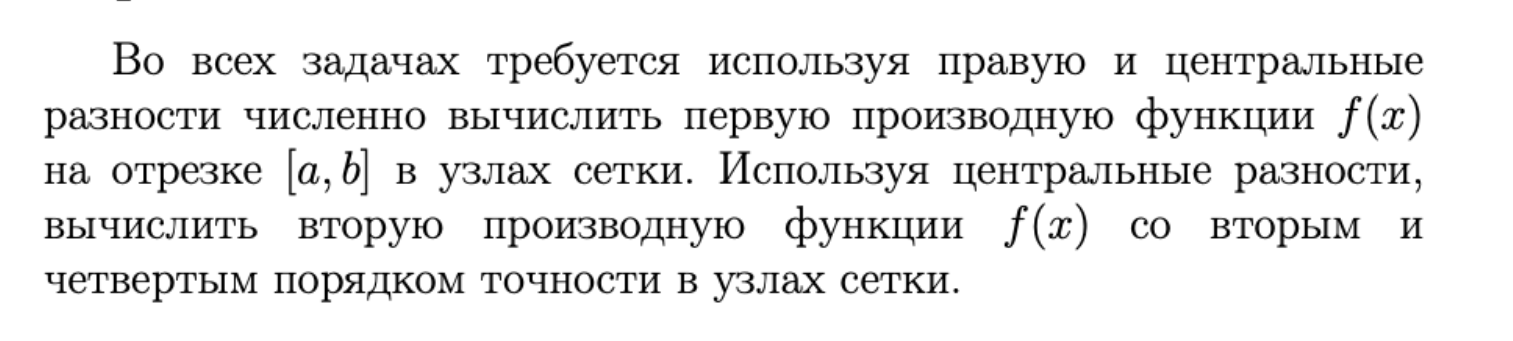

In [137]:
import math
import matplotlib.pyplot as plt
import numpy as np


def func(x):
  return (np.cos(x))**2

def d1_func(x):
  return (-np.sin(2*x))

def right(current, next, h):
  return (next-current)/h

def center(prev, next, h):
  return (next-prev)/(2*h)

def left(prev, current, h):
  return (current-prev)/h


# *Вычисление производных:*

In [138]:
n = 20 #кол-во точек
a = -1.5
b = 1.5
h = (b-a)/(n-1)

f_right = []
f_center = []
f_left = []

def right_dif (h,n):
  x = np.arange(a,b+h,h)
  y = func(x)
  for i in range(0, n-1):
    f_right.append (right(y[i],y[i+1],h))
  return f_right
  
def center_dif (h,n):
  x = np.arange(a,b+h,h)
  y = func(x)
  for i in range(1,n-1):
    f_center.append (center(y[i-1],y[i+1],h))
  return f_center

def left_dif (h,n):
  x = np.arange(a,b+h,h)
  y = func(x)
  for i in range(1, n):
    f_left.append (left(y[i-1],y[i],h))
  return f_left



20


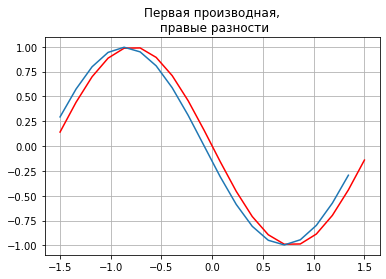

In [113]:
x1_true = np.arange(a,b+h, h)
y1_true= d1_func(x1_true)

plt.title("Первая производная,\n правые разности")
plt.grid(True)
plt.plot(x1_true, y1_true, color = 'red')
plt.plot(x1_true[0:n-1],right_dif(h,n))
plt.show()


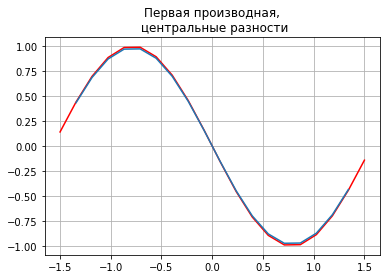

In [114]:
x2_true = np.arange(a,b+h, h)
y2_true= d1_func(x2_true)

plt.title("Первая производная,\n центральные разности")
plt.grid(True)
plt.plot(x2_true, y2_true, color = 'red')
plt.plot(x2_true[1:n-1],center_dif(h,n))
plt.show()


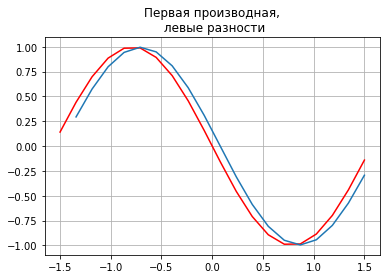

In [115]:
x3_true = np.arange(a,b+h, h)
y3_true= d1_func(x3_true)

plt.title("Первая производная,\n левые разности")
plt.grid(True)
plt.plot(x3_true, y3_true, color = 'red')
plt.plot(x3_true[1:n],left_dif(h,n))
plt.show()

# Погрешности

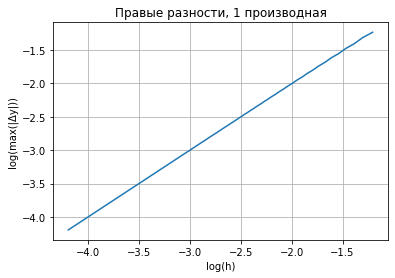

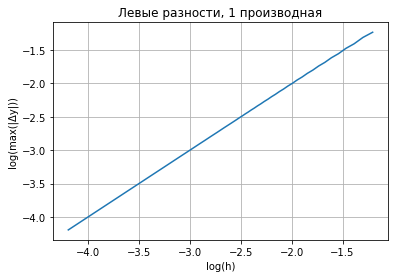

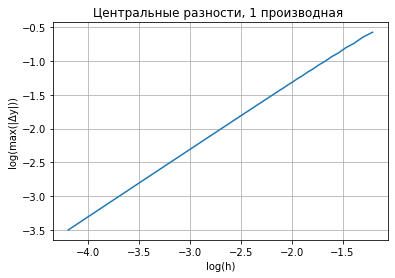

In [161]:

def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(result))]
    return max(dfr)

def logarithm():
    dfr_array1 = []
    dfr_array2 = []
    dfr_array3 = []
    hi_array = []
  
    for i in range(10,200):
        hi = (b - a) / i
        hi_array.append(math.log(hi))

        x_array = np.arange(a,b+hi, hi)
        y_real = [d1_func(element) for element in x_array]

        ydif1_array = right_dif(hi, i)
        ydif2_array = left_dif(hi, i)
        ydif3_array = center_dif(hi, i)

        dfr_array1.append(math.log(difference(y_real, ydif1_array)))
        dfr_array2.append(math.log(difference(y_real, ydif2_array)))
        dfr_array3.append(math.log(difference(y_real, ydif3_array)))
        ydif1_array.clear()
        ydif2_array.clear()
        ydif3_array.clear()

    dfr_array = [dfr_array1, dfr_array2, dfr_array3 ]
    method = ['Правые разности, 1 производная', 'Левые разности, 1 производная','Центральные разности, 1 производная ']
    for i in range (3):
     dd = plt.figure(i)
     ax = dd.add_subplot(111)
     ax.set_xlabel('log(h)')
     ax.set_ylabel("log(max(|Δy'|))")
     plt.title(method[i])
     plt.grid()
     
     plt.plot (hi_array,dfr_array[i], label = "Абсолютная погрешность")
    plt.show()    


logarithm()

# *Вторая производная:*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


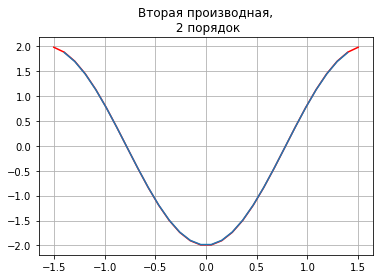

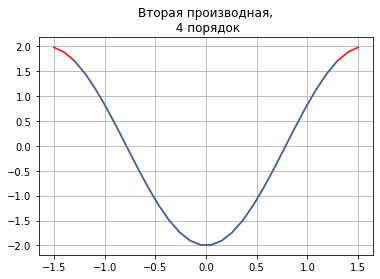

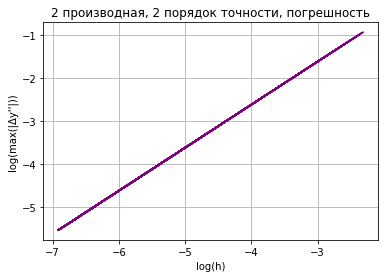

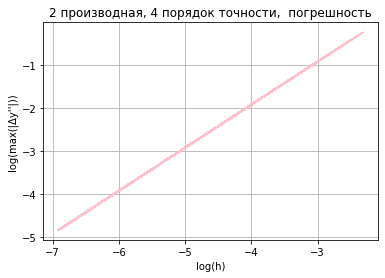

In [197]:
n = 30
a = -1.5
b = 1.5
h = (b-a)/(n-1)

def func(x):
  return (np.cos(x))**2

def d2_func(x):
  return (-2*np.cos(2*x))

def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(result))]
    return max(dfr)

def d2_dif2(h,n):
  dif2 = []
  x = np.arange(a,b+h,h)
  y = func(x)
  for i in range(1,n-1):
    dif2.append ((y[i-1]-2*y[i]+y[i+1])/(h**2))
  return dif2

def d2_dif4(h,n):
  dif2 = []
  x = np.arange(a,b+h,h)
  y = func(x)
  for i in range(2,n-2):
    dif2.append ((-y[i-2] + 16 * y[i-1] - 30 * y[i] + 16 * y[i+1] - y[i+2])/(12*(h**2)))
  return dif2

x_true = np.arange(a,b+h, h)
y_true= d2_func(x_true)

plt.figure(1)
plt.title("Вторая производная,\n 2 порядок")
plt.grid(True)
plt.plot(x_true,y_true, color = 'red')
plt.plot(x_true[1:n-1], d2_dif2(h,n))


plt.figure(2)
plt.title("Вторая производная,\n 4 порядок")
plt.grid(True)
plt.plot(x_true,y_true, color = 'red')
plt.plot(x_true[2:n-2], d2_dif4(h,n))

def logarithm():
    dfr_array1 = []
    dfr_array2 = []
    hi_array = []
    hmin = 0.001
    step = 0.001
    hmax = 0.1
    h1 = np.arange(hmin, hmax, step)

    for hi in h1:
        hi_array.append(math.log(hi))

        x_array = np.arange(a,b+hi, hi)
        y_real = [d2_func(element) for element in x_array]
        ydif1_array = d2_dif2(hi, len(x_array))
        ydif2_array = d2_dif4(hi, len(x_array))

        dfr_array1.append(math.log(difference(y_real, ydif1_array)))
        ydif1_array.clear()

        dfr_array2.append(math.log(difference(y_real, ydif2_array)))
        ydif2_array.clear()

        g3 = plt.figure(3)
        ax3 = g3.add_subplot(111)
        ax3.set_xlabel('log(h)')
        ax3.set_ylabel("log(max(|Δy''|))")
        plt.grid(True)
        plt.title("2 производная, 2 порядок точности, погрешность")
        plt.plot (hi_array,dfr_array1, color = 'purple')
        

        g4 = plt.figure(4)
        ax4 = g4.add_subplot(111)
        ax4.set_xlabel('log(h)')
        ax4.set_ylabel("log(max(|Δy''|))")
        plt.grid(True)
        plt.title("2 производная, 4 порядок точности,  погрешность")
        plt.plot (hi_array,dfr_array2, color = 'pink')

logarithm()







